In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
cd

C:\Users\sujeeth1


In [4]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

In [12]:
 dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory='potato_disease/PlantVillage', 
        image_size=(IMAGE_SIZE),              
        batch_size=BATCH_SIZE,                      
        shuffle=True,         )          

Found 2152 files belonging to 3 classes.


In [14]:
classes=dataset.class_names

In [15]:
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(256, 256, 3) (32,)


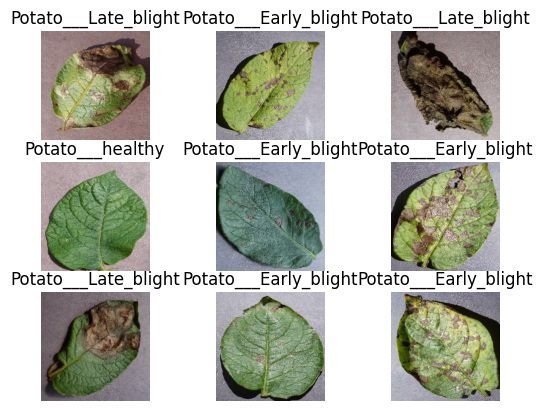

In [63]:
for i in dataset.take(1):
    images, labels = i
    print(images[0].shape, labels.shape)
    for img in range(9):
        plt.subplot(3, 3, img + 1)
        plt.imshow(images[img].numpy().astype("uint8"))
        plt.title(classes[labels[img]])

        plt.axis("off")


In [ ]:
train_size=0.8 
train_size*=len(dataset)
train_size

54.400000000000006

In [56]:
train_ds=dataset.take(int(train_size) )
len(train_ds)

54

In [49]:
test_ds=dataset.skip(int(train_size) )

In [50]:
len(test_ds)

14

In [51]:
val_size=0.1
val_size=val_size*len(dataset)
val_size

6.800000000000001

In [52]:
val_ds=test_ds.take(int(val_size))
len(val_ds)

6

In [53]:
test_ds=test_ds.skip(int(val_size))
len(test_ds)

8

In [54]:
len(train_ds)

54

In [57]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [59]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    layers.Rescaling(1.0 / 255)
])

In [61]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [64]:
model=models.Sequential([ 
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(BATCH_SIZE,IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(classes), activation='softmax')
  ])

model.build((BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

c:\Users\sujeeth1\potato_disease\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 4608)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,458,435 (5.56 MB)

 Trainable params: 1,458,435 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [67]:
history = model.fit(
    train_ds,epochs=50,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 715ms/step - accuracy: 0.4912 - loss: 0.9103 - val_accuracy: 0.6771 - val_loss: 0.6829
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 784ms/step - accuracy: 0.7905 - loss: 0.5130 - val_accuracy: 0.8438 - val_loss: 0.4246
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.8703 - loss: 0.3246 - val_accuracy: 0.8594 - val_loss: 0.3544
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 751ms/step - accuracy: 0.9267 - loss: 0.2057 - val_accuracy: 0.8333 - val_loss: 0.3299
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 814ms/step - accuracy: 0.9345 - loss: 0.1748 - val_accuracy: 0.8698 - val_loss: 0.2162
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 913ms/step - accuracy: 0.9492 - loss: 0.1382 - val_accuracy: 0.9062 - val_loss: 0.2150
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 916ms/step - accuracy: 0.9631 - loss: 0.1061 - val_accuracy: 0.9167 - val_loss: 0.2034
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 896ms/step - accuracy: 0.9491 - loss: 0.1430 - val_accu

In [68]:
result=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9794 - loss: 0.0302


In [69]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [70]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [71]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']    
loss= history.history['loss']
val_loss= history.history['val_loss']

50

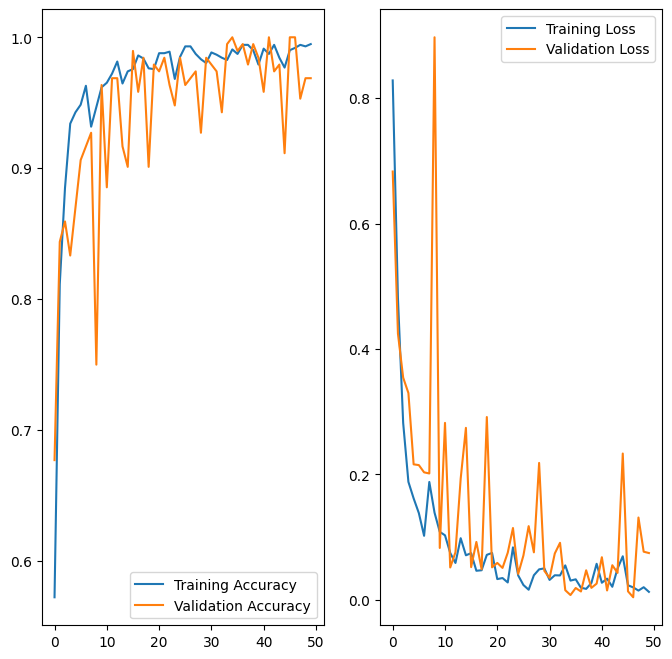

In [77]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend(loc='upper right')

Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Potato___Early_blight


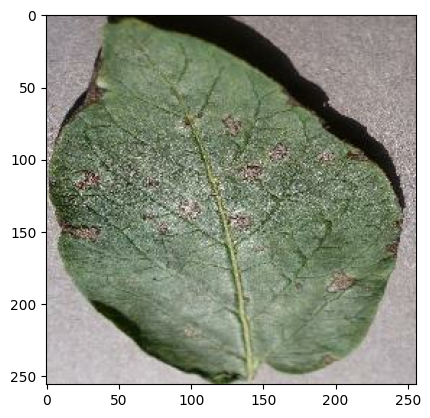

In [88]:
import numpy as np
for img_batch,label_batch in test_ds.take(1):
    plt.imshow(img_batch[0].numpy().astype("uint8"))
    print( classes[label_batch[0]])
    predicted=model.predict(img_batch)
    print(classes[np.argmax(predicted[0])])

In [90]:
cd

C:\Users\sujeeth1


In [110]:

model.save(rf"C:\Users\sujeeth1\potato_disease\models\{model_version}.keras")


In [109]:
import os
model_version=max([int(i.split('.')[0]) for i in os.listdir(r"potato_disease/models")]) + 1
model_version

3

In [112]:
pip install fastapi

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 13.5 MB/s eta 0:00:00

   ---------- ----------------------------- 2/8 [pydantic-core]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------- ------------------- 4/8 [pydantic]
   -------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
pip install uvicorn


   ---------------------------------------- 0/3 [h11]
   ------------- -------------------------- 1/3 [click]
   ------------- -------------------------- 1/3 [click]
   -------------------------- ------------- 2/3 [uvicorn]
   -------------------------- ------------- 2/3 [uvicorn]
   -------------------------- ------------- 2/3 [uvicorn]
   -------------------------- ------------- 2/3 [uvicorn]
   -------------------------- ------------- 2/3 [uvicorn]
   -------------------------- ------------- 2/3 [uvicorn]
   ---------------------------------------- 3/3 [uvicorn]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
